
#  Análisis Exploratorio de Datos 

**Análisis Exploratorio de Datos ** del conjunto de datos de **tasas de suicidio y probabilidad de muerte por enfermedades no transmisibles** (ECNT). 

Este proceso nos ayudará a comprender la estructura del dataset, identificar la calidad de los datos y prepararlos para futuros modelos de **Clasificación** y **Regresión**.



## 1. Carga y Estructura Inicial del Dataset

El primer paso es cargar el archivo CSV en un DataFrame de `pandas` e inspeccionar su estructura.

<br>

|  **Tarea** |  **Propósito** |
| :--- | :--- |
| **`pd.read_csv()`** | Cargar el archivo adjunto. |
| **`df.head()`** | Ver las primeras filas y confirmar la carga. |
| **`df.info()`** | Conocer el número de filas/columnas, tipos de datos y la presencia de valores nulos (missing values). |

---


In [4]:
import pandas as pd
import numpy as np

# Cargar el dataset
df = pd.read_csv('crude_suicide_rates.csv')

# Mostrar las primeras filas y la información del DataFrame
print("--- Primeras 5 Filas ---")
print(df.head())
print("\n--- Información del DataFrame ---")
df.info()



--- Primeras 5 Filas ---
    Unnamed: 0 Unnamed: 1  \
0      Country       Year   
1  Afghanistan       2016   
2  Afghanistan       2015   
3  Afghanistan       2010   
4  Afghanistan       2005   

  Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease  \
0                                         Both sexes                                                                                              
1                                               29.8                                                                                              
2                                               29.8                                                                                              
3                                               31.7                                                                                              
4                                               34.1             

## 2. Limpieza de Nombres de Columnas

Los nombres de las columnas originales son demasiado largos y difíciles de manejar. Procederemos a simplificarlos para mejorar la **legibilidad** del código y facilitar la manipulación de las variables.

|  **Original** |  **Nuevo Nombre** | **Tipo de Variable** |
| :--- | :--- | :--- |
| `Probability (%) of dying...` | `Prob_Muerte_ECNT...` | Target para **Regresión** o Feature |
| `Crude suicide rates...` | `Tasa_Suicidio_Cruda...` | Target para **Regresión** o Feature |
| `Country` | `Country` | Feature para **Clasificación** |
| `Year` | `Year` | Feature |

Posteriormente, utilizamos **`df.describe()`** para obtener un resumen estadístico (media, desviación estándar, min/max, cuartiles) de las columnas numéricas. Esto nos da una idea de la **distribución** y el **rango** de las tasas.



In [5]:
# Crear una lista de los nombres de columnas originales
columnas_originales = df.columns.tolist()

# Definir los nuevos nombres de columnas
nuevas_columnas = [
    'Country',
    'Year',
    'Prob_Muerte_ECNT_Ambos',
    'Prob_Muerte_ECNT_Hombres',
    'Prob_Muerte_ECNT_Mujeres',
    'Tasa_Suicidio_Cruda_Ambos',
    'Tasa_Suicidio_Cruda_Hombres',
    'Tasa_Suicidio_Cruda_Mujeres'
]

# Asignar los nuevos nombres al DataFrame
df.columns = nuevas_columnas

# Mostrar las columnas limpias y un resumen estadístico inicial
print("--- Nuevos Nombres de Columnas ---")
print(df.columns.tolist())
print("\n--- Resumen Estadístico de Columnas Numéricas ---")
print(df.describe())


--- Nuevos Nombres de Columnas ---
['Country', 'Year', 'Prob_Muerte_ECNT_Ambos', 'Prob_Muerte_ECNT_Hombres', 'Prob_Muerte_ECNT_Mujeres', 'Tasa_Suicidio_Cruda_Ambos', 'Tasa_Suicidio_Cruda_Hombres', 'Tasa_Suicidio_Cruda_Mujeres']

--- Resumen Estadístico de Columnas Numéricas ---
            Country  Year Prob_Muerte_ECNT_Ambos Prob_Muerte_ECNT_Hombres  \
count           916   916                    916                      916   
unique          184     6                    243                      282   
top     Afghanistan  2016                   18.1                     22.6   
freq              5   183                     13                       12   

       Prob_Muerte_ECNT_Mujeres Tasa_Suicidio_Cruda_Ambos  \
count                       916                       916   
unique                      242                       241   
top                        23.1                       3.2   
freq                         11                        14   

       Tasa_Suicidio_Cruda_Ho

## 3. Conversión de Tipos y Manejo de Datos Faltantes (NaN)

Al inspeccionar `df.info()`, notamos que las columnas con las tasas están clasificadas como tipo **`Object`** (cadena de texto) en lugar de **`Float`** (número decimal). Esto probablemente se debe a espacios o caracteres ocultos en el archivo original.

### Conversión de Tipos (`pd.to_numeric`)

Utilizamos `pd.to_numeric` con el argumento `errors='coerce'` para convertir las columnas a numéricas. Cualquier valor que no se pueda convertir se transforma en **`NaN`** (Not a Number), lo que nos permite detectarlo fácilmente como un valor nulo.

### Manejo de Valores Nulos (Imputación)

Una vez identificados los **`NaN`**, aplicamos una técnica de **Imputación**:

* **Estrategia:** Rellenamos los valores faltantes con la **Mediana** de su respectiva columna.
* **Razón:** La mediana es menos sensible a los valores atípicos (outliers) que la media, lo que resulta en una imputación más robusta.

---

In [11]:
# Columnas a convertir a numérico (Float)
columnas_numericas = [
    'Prob_Muerte_ECNT_Ambos', 'Prob_Muerte_ECNT_Hombres', 'Prob_Muerte_ECNT_Mujeres',
    'Tasa_Suicidio_Cruda_Ambos', 'Tasa_Suicidio_Cruda_Hombres', 'Tasa_Suicidio_Cruda_Mujeres'
]

# Aplicar la conversión forzada a numérico (los errores serán NaN)
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Revisar la cantidad de valores nulos (NaN)
print("--- Conteo de Valores Nulos después de la Conversión ---")
nulos_conteo = df.isnull().sum()
print(nulos_conteo[nulos_conteo > 0])

# Imputación de nulos: Rellenaremos los valores NaN de las columnas numéricas con la mediana.
# La mediana es más robusta a outliers que la media.
for col in columnas_numericas:
    #df[col].fillna(df[col].median(), inplace=True)
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(pd.to_numeric(df[col], errors='coerce').median())

# Confirmar que no hay nulos en las columnas numéricas
print("\n--- Conteo de Nulos Después de Imputación ---")
print(df.isnull().sum())
print("\n--- Tipos de Datos Actualizados ---")
df.info()

--- Conteo de Valores Nulos después de la Conversión ---
Series([], dtype: int64)

--- Conteo de Nulos Después de Imputación ---
Country                        0
Year                           0
Prob_Muerte_ECNT_Ambos         0
Prob_Muerte_ECNT_Hombres       0
Prob_Muerte_ECNT_Mujeres       0
Tasa_Suicidio_Cruda_Ambos      0
Tasa_Suicidio_Cruda_Hombres    0
Tasa_Suicidio_Cruda_Mujeres    0
Categoria_Suicidio             0
dtype: int64

--- Tipos de Datos Actualizados ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      916 non-null    object 
 1   Year                         916 non-null    object 
 2   Prob_Muerte_ECNT_Ambos       916 non-null    float64
 3   Prob_Muerte_ECNT_Hombres     916 non-null    float64
 4   Prob_Muerte_ECNT_Mujeres     916 non-null    float64
 5   Tasa_Suic

## 4. Análisis de Correlación para Regresión

La **Regresión** busca modelar la relación entre una variable dependiente (Target) y una o más variables independientes (Features). La **Correlación** es una medida fundamental en este contexto, ya que cuantifica la fuerza y dirección de la relación lineal entre dos variables.

### Interpretación del Mapa de Calor

* **Valores cercanos a +1.0:** Indican una **correlación positiva fuerte**. Si una variable sube, la otra también sube (ejemplo: `Prob_Muerte_ECNT_Ambos` vs. `Prob_Muerte_ECNT_Hombres`).
* **Valores cercanos a -1.0:** Indican una **correlación negativa fuerte**. Si una variable sube, la otra baja.
* **Valores cercanos a 0.0:** Indican **poca o ninguna relación lineal**.

Observamos una **alta multicolinealidad** entre las tasas por sexo (Hombre/Mujer) y la tasa total (Ambos). Esto es esperado, pero debe ser considerado al seleccionar *features* para modelos de Regresión.

---

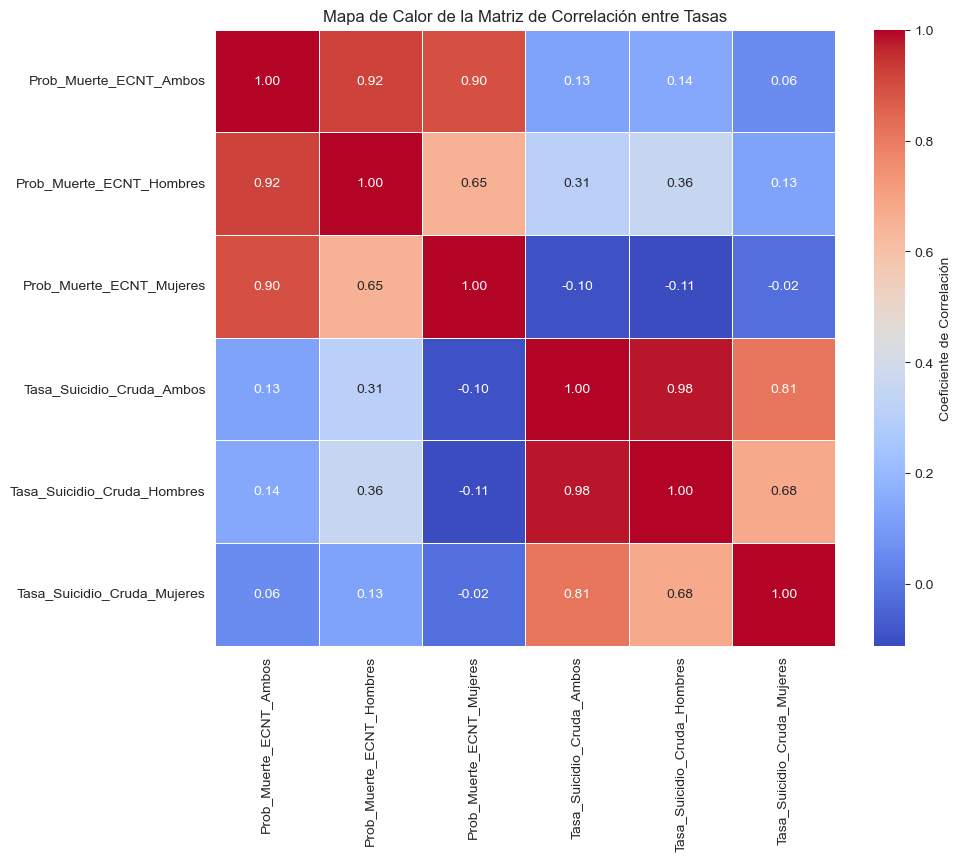


--- Correlación con la Tasa de Suicidio Cruda (Ambos) ---
Tasa_Suicidio_Cruda_Ambos      1.000000
Tasa_Suicidio_Cruda_Hombres    0.979340
Tasa_Suicidio_Cruda_Mujeres    0.809437
Prob_Muerte_ECNT_Hombres       0.311303
Prob_Muerte_ECNT_Ambos         0.125960
Prob_Muerte_ECNT_Mujeres      -0.096169
Name: Tasa_Suicidio_Cruda_Ambos, dtype: float64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = df[columnas_numericas].corr()

# Crear un mapa de calor (heatmap) para visualizar la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Coeficiente de Correlación'})
plt.title('Mapa de Calor de la Matriz de Correlación entre Tasas')
plt.show()

# Análisis de correlación de la Tasa de Suicidio Cruda Total vs el resto
print("\n--- Correlación con la Tasa de Suicidio Cruda (Ambos) ---")
print(correlation_matrix['Tasa_Suicidio_Cruda_Ambos'].sort_values(ascending=False))

## 5. Preparación para Modelos de Clasificación

La **Clasificación** busca predecir una **variable categórica** (clase o etiqueta). Dado el dataset, un ejercicio útil es predecir si un país tiene una **Tasa de Suicidio** **"Alta"** o **"Baja"**.


1.  **Creación de la Variable Target (`Categoria_Suicidio`)**:
    * Definimos un **umbral** (usando la mediana de la tasa de suicidio global).
    * Si la tasa es **mayor que la mediana**, se etiqueta como **'Alta'**.
    * Si es **menor o igual**, se etiqueta como **'Baja'**.

2.  **Codificación de Variables Categóricas (Features)**:
    * Los modelos de *Machine Learning* no pueden procesar texto directamente (como el nombre del país).
    * La técnica de **One-Hot Encoding** (`pd.get_dummies()`) convierte cada valor categórico único (`Country`) en una nueva columna binaria (0 o 1). Esto crea *features* que son procesables por algoritmos de clasificación (como Regresión Logística o Árboles de Decisión).

|  **Target** |   **Features** |
| :--- | :--- |
| `Categoria_Suicidio` (**Clasificación**) | `Country` (Codificada), `Prob_Muerte_ECNT...`, `Year` |

---

In [8]:
# Definir el umbral (ejemplo: la mediana de la tasa de suicidio cruda total)
# Si la tasa es mayor a la mediana, será 'Alta', si no, será 'Baja'.
umbral_suicidio = df['Tasa_Suicidio_Cruda_Ambos'].median()

# Crear la variable binaria (Target para Clasificación)
df['Categoria_Suicidio'] = np.where(
    df['Tasa_Suicidio_Cruda_Ambos'] > umbral_suicidio,
    'Alta',
    'Baja'
)

# Contar la distribución de la nueva variable Target
print("--- Distribución de la Nueva Variable Target para Clasificación ---")
print(df['Categoria_Suicidio'].value_counts())

# Codificación one-hot para la variable 'Country' (ejemplo de Feature para Clasificación)
# Solo para los 5 países más frecuentes para mantener el ejemplo conciso
top_5_countries = df['Country'].value_counts().nlargest(5).index
df_top_countries = df[df['Country'].isin(top_5_countries)]

country_dummies = pd.get_dummies(df_top_countries['Country'], prefix='Country')
print("\n--- Ejemplo de Features Codificadas para Clasificación (Top 5 Países) ---")
print(country_dummies.head())

--- Distribución de la Nueva Variable Target para Clasificación ---
Categoria_Suicidio
Baja    466
Alta    450
Name: count, dtype: int64

--- Ejemplo de Features Codificadas para Clasificación (Top 5 Países) ---
   Country_Afghanistan  Country_Albania  Country_Algeria  Country_Angola  \
1                 True            False            False           False   
2                 True            False            False           False   
3                 True            False            False           False   
4                 True            False            False           False   
5                 True            False            False           False   

   Country_Argentina  
1              False  
2              False  
3              False  
4              False  
5              False  


## 6. Definición de Variables para Regresión y Conclusión

El último paso del EDA es formalizar las variables que utilizaremos en el modelado.

###  Variables para Regresión

En un modelo de Regresión (por ejemplo, Regresión Lineal), podríamos intentar **predecir la Tasa de Suicidio Cruda total** (`Tasa_Suicidio_Cruda_Ambos`) en función de la probabilidad de muerte por enfermedades no transmisibles (`Prob_Muerte_ECNT_Ambos`) y el año.

| Tipo | Variable | Propósito |
| :--- | :--- | :--- |
| **Target** | `Tasa_Suicidio_Cruda_Ambos` | Variable Continua a **Predecir** |
| **Features** | `Prob_Muerte_ECNT_Ambos`, `Year` | Variables Independientes |

<br>

***



In [9]:
# 1. Definición del TARGET para REGRESIÓN
target_regresion = 'Tasa_Suicidio_Cruda_Ambos'

# 2. Definición de FEATURES para REGRESIÓN (usando solo variables numéricas no colineales)
features_regresion = [
    'Prob_Muerte_ECNT_Ambos', # Podría ser un buen predictor
    'Year' # Tendencia temporal
]

X_reg = df[features_regresion]
y_reg = df[target_regresion]

print(f"Target de Regresión: {target_regresion}")
print(f"Features de Regresión: {features_regresion}")

# Mostrar las primeras filas del conjunto X e y
print("\n--- Vista Previa de X (Features) para Regresión ---")
print(X_reg.head())
print("\n--- Vista Previa de y (Target) para Regresión ---")
print(y_reg.head())

Target de Regresión: Tasa_Suicidio_Cruda_Ambos
Features de Regresión: ['Prob_Muerte_ECNT_Ambos', 'Year']

--- Vista Previa de X (Features) para Regresión ---
   Prob_Muerte_ECNT_Ambos  Year
0                    20.8  Year
1                    29.8  2016
2                    29.8  2015
3                    31.7  2010
4                    34.1  2005

--- Vista Previa de y (Target) para Regresión ---
0    8.1
1    4.7
2    4.8
3    5.1
4    6.3
Name: Tasa_Suicidio_Cruda_Ambos, dtype: float64


In [12]:
df.to_csv('crude_suicide_rates_mod.csv', index=False)